In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
bitcoin_df  =  pd.read_csv("data/bitcoin_df.csv", index_col=0)
ethereum_df  =  pd.read_csv("data/ethereum_df.csv", index_col=0)
tether_df  =  pd.read_csv("data/tether_df.csv", index_col=0)
binancecoin_df  =  pd.read_csv("data/binancecoin_df.csv", index_col=0)
ripple_df  =  pd.read_csv("data/ripple_df.csv", index_col=0)
usd_coin_df  =  pd.read_csv("data/usd_coin_df.csv", index_col=0)
staked_ether_df  =  pd.read_csv("data/staked_ether_df.csv", index_col=0)
cardano_df  =  pd.read_csv("data/cardano_df.csv", index_col=0)
solana_df  =  pd.read_csv("data/solana_df.csv", index_col=0)
dogecoin_df  =  pd.read_csv("data/dogecoin_df.csv", index_col=0)

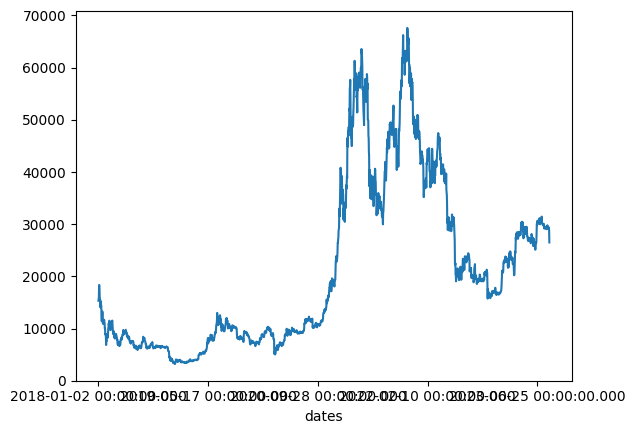

In [101]:
bitcoin_df.set_index("dates", drop=True)["prices"].plot();

<Axes: >

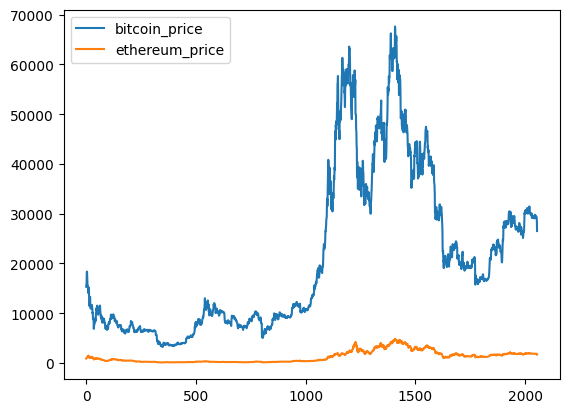

In [102]:
pd.concat([bitcoin_df["prices"].rename("bitcoin_price"), ethereum_df["prices"].rename("ethereum_price")], axis=1).plot()

# Filling date for continuity


If we were to attempt to filter through dates.. maybe there will some missing dates in the linspace.. for example the crupto currency solana has some dates missing..

In [123]:
def linspace_for_dates(base_date:str, number_of_days:int):
    """
    Generate a list of dates starting from a base date and extending for a specified number of days.

    This function creates a sequence of dates starting from the provided base date and extending for the given number of days.
    
    Parameters:
        base_date (str): The starting date in the format 'YYYY-MM-DD'.
        number_of_days (int): The number of days to generate in the sequence.

    Returns:
        list: A list of dates in 'YYYY-MM-DD' format.

    Example:
        base_date = "2023-01-01"
        num_days = 30
        date_sequence = linspace_for_dates(base_date, num_days)
    """


    base_date = pd.to_datetime(base_date)  # Replace with your desired start date
    num_days = number_of_days  # Number of days
    step_size = np.timedelta64(1, 'D')  # 1 day

    date_linspace = base_date + np.arange(num_days) * step_size

    date_linspace = pd.DataFrame(date_linspace).rename(columns={0:"dates"})
    return pd.DataFrame(date_linspace["dates"].dt.date)

In [124]:
date_linspace = (linspace_for_dates("2018-01-01", 2054))

In [125]:
bitcoin_df["dates"] = pd.to_datetime(bitcoin_df["dates"]).dt.date 
ethereum_df["dates"] = pd.to_datetime(ethereum_df["dates"]).dt.date
tether_df["dates"] = pd.to_datetime(tether_df["dates"]).dt.date
binancecoin_df["dates"] = pd.to_datetime(binancecoin_df["dates"]).dt.date
ripple_df["dates"] = pd.to_datetime(ripple_df["dates"]).dt.date
usd_coin_df["dates"] = pd.to_datetime(usd_coin_df["dates"]).dt.date
staked_ether_df["dates"] = pd.to_datetime(staked_ether_df["dates"]).dt.date
cardano_df["dates"] = pd.to_datetime(cardano_df["dates"]).dt.date
solana_df["dates"] = pd.to_datetime(solana_df["dates"]).dt.date
dogecoin_df["dates"] = pd.to_datetime(dogecoin_df["dates"]).dt.date

In [126]:
date_linspace = date_linspace.merge(bitcoin_df[["dates", "prices"]], on="dates", how="left").rename(columns={"prices": "bitcoin_prices"})
date_linspace = date_linspace.merge(ethereum_df[["dates", "prices"]], on="dates", how="left").rename(columns={"prices": "ethereum_prices"})
date_linspace = date_linspace.merge(tether_df[["dates", "prices"]], on="dates", how="left").rename(columns={"prices": "tether_df_prices"})
date_linspace = date_linspace.merge(binancecoin_df[["dates", "prices"]], on="dates", how="left").rename(columns={"prices": "binancecoin_price"})
date_linspace = date_linspace.merge(ripple_df[["dates", "prices"]], on="dates", how="left").rename(columns={"prices": "ripple_prices"})
date_linspace = date_linspace.merge(usd_coin_df[["dates", "prices"]], on="dates", how="left").rename(columns={"prices": "usd_coin_prices"})
date_linspace = date_linspace.merge(staked_ether_df[["dates", "prices"]], on="dates", how="left").rename(columns={"prices": "staked_ether_prices"})
date_linspace = date_linspace.merge(cardano_df[["dates", "prices"]], on="dates", how="left").rename(columns={"prices": "cardano__prices"})
date_linspace = date_linspace.merge(solana_df[["dates", "prices"]], on="dates", how="left").rename(columns={"prices": "solana_prices"})
date_linspace = date_linspace.merge(dogecoin_df[["dates", "prices"]], on="dates", how="left").rename(columns={"prices": "dogecoin_prices"})
coin_prices_df = date_linspace.copy()

In [127]:
coin_prices_df.fillna(0)

,dates,bitcoin_prices,ethereum_prices,tether_df_prices,binancecoin_price,ripple_prices,usd_coin_prices,staked_ether_prices,cardano__prices,solana_prices,dogecoin_prices
0,2018-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2018-01-02,15321.932852,876.890259,1.003920,9.090393,2.455290,0.000000,0.000000,0.807430,0.000000,0.009335
2,2018-01-03,15583.885538,963.055751,1.015780,9.886323,3.125710,0.000000,0.000000,1.075401,0.000000,0.009592
3,2018-01-04,15976.365194,978.416104,1.002740,9.675758,3.220050,0.000000,0.000000,1.179347,0.000000,0.010098
4,2018-01-05,18336.922980,1004.894972,0.999695,16.488523,2.931380,0.000000,0.000000,1.077821,0.000000,0.013841
...,...,...,...,...,...,...,...,...,...,...,...
2049,2023-08-12,29396.847971,1847.541835,0.998938,239.595822,0.631618,1.000269,1846.298313,0.293325,24.579810,0.075714
2050,2023-08-13,29412.142275,1848.505239,0.999377,240.088445,0.627081,0.999880,1846.710998,0.291666,24.891819,0.076696
2051,2023-08-14,29284.969714,1839.512810,0.999384,240.030792,0.625689,0.999981,1837.912572,0.289372,24.223294,0.074778
2052,2023-08-15,29400.586804,1843.513391,0.998713,240.358056,0.634681,0.999688,1842.552503,0.290452,25.147725,0.074764


In [128]:
def percentage_null(data_frame: pd.DataFrame | pd.Series):
    return round((data_frame.isna().sum().sort_values(ascending=False) / data_frame.shape[0] * 100),2)

In [129]:
percentage_null(coin_prices_df)

staked_ether_prices    52.87
solana_prices          40.46
usd_coin_prices        13.49
tether_df_prices        0.10
bitcoin_prices          0.05
ethereum_prices         0.05
binancecoin_price       0.05
ripple_prices           0.05
cardano__prices         0.05
dogecoin_prices         0.05
dates                   0.00
dtype: float64

In [170]:
def plot_range_dates(data_frame:pd.DataFrame, columns:list, start_date:str, periods:int):

    return (data_frame.set_index("dates")
                        # Filtering settings
                    .loc[pd.date_range(start=start_date, periods=periods, freq='D'),
                            columns
                            ]
                        # Plotting settings
                    .plot(
                        figsize=(25, 10),
                        linewidth=3
                    ));

In [131]:
date_linspace.columns

Index(['dates', 'bitcoin_prices', 'ethereum_prices', 'tether_df_prices',
       'binancecoin_price', 'ripple_prices', 'usd_coin_prices',
       'staked_ether_prices', 'cardano__prices', 'solana_prices',
       'dogecoin_prices'],
      dtype='object')

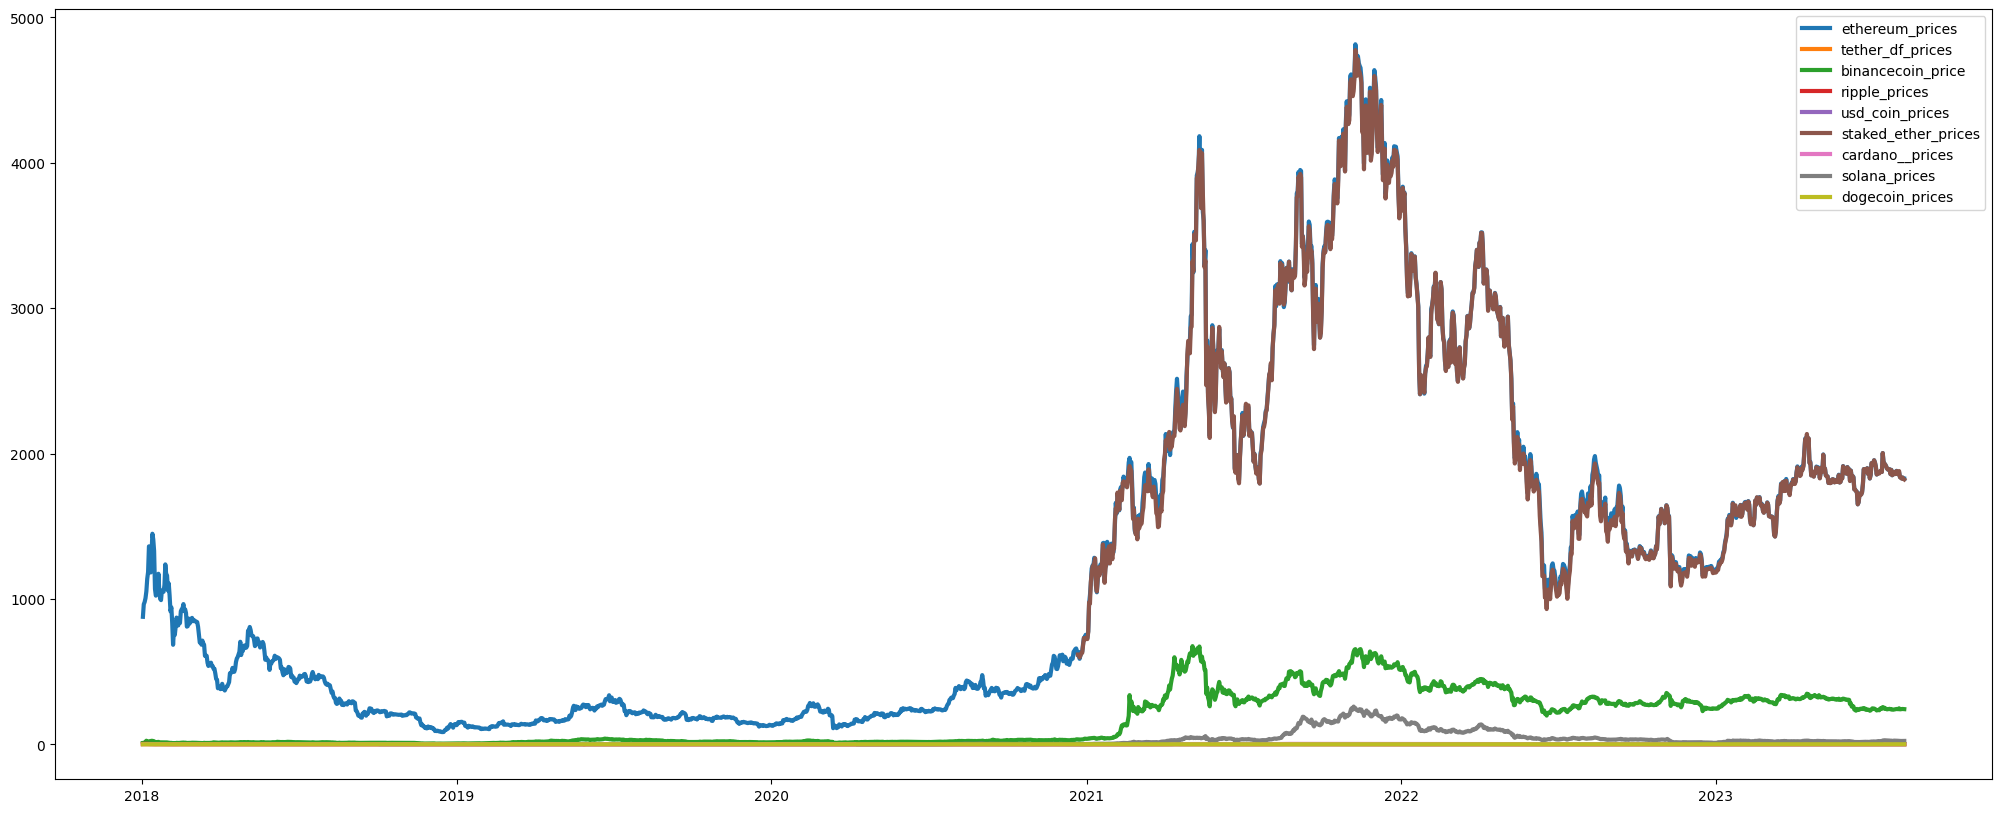

In [171]:
plot_range_dates(coin_prices_df,columns=['ethereum_prices', 'tether_df_prices',
        'binancecoin_price', 'ripple_prices', 'usd_coin_prices',
        'staked_ether_prices', 'cardano__prices', 'solana_prices',
        'dogecoin_prices'], start_date="2018-01-02", periods=2045);

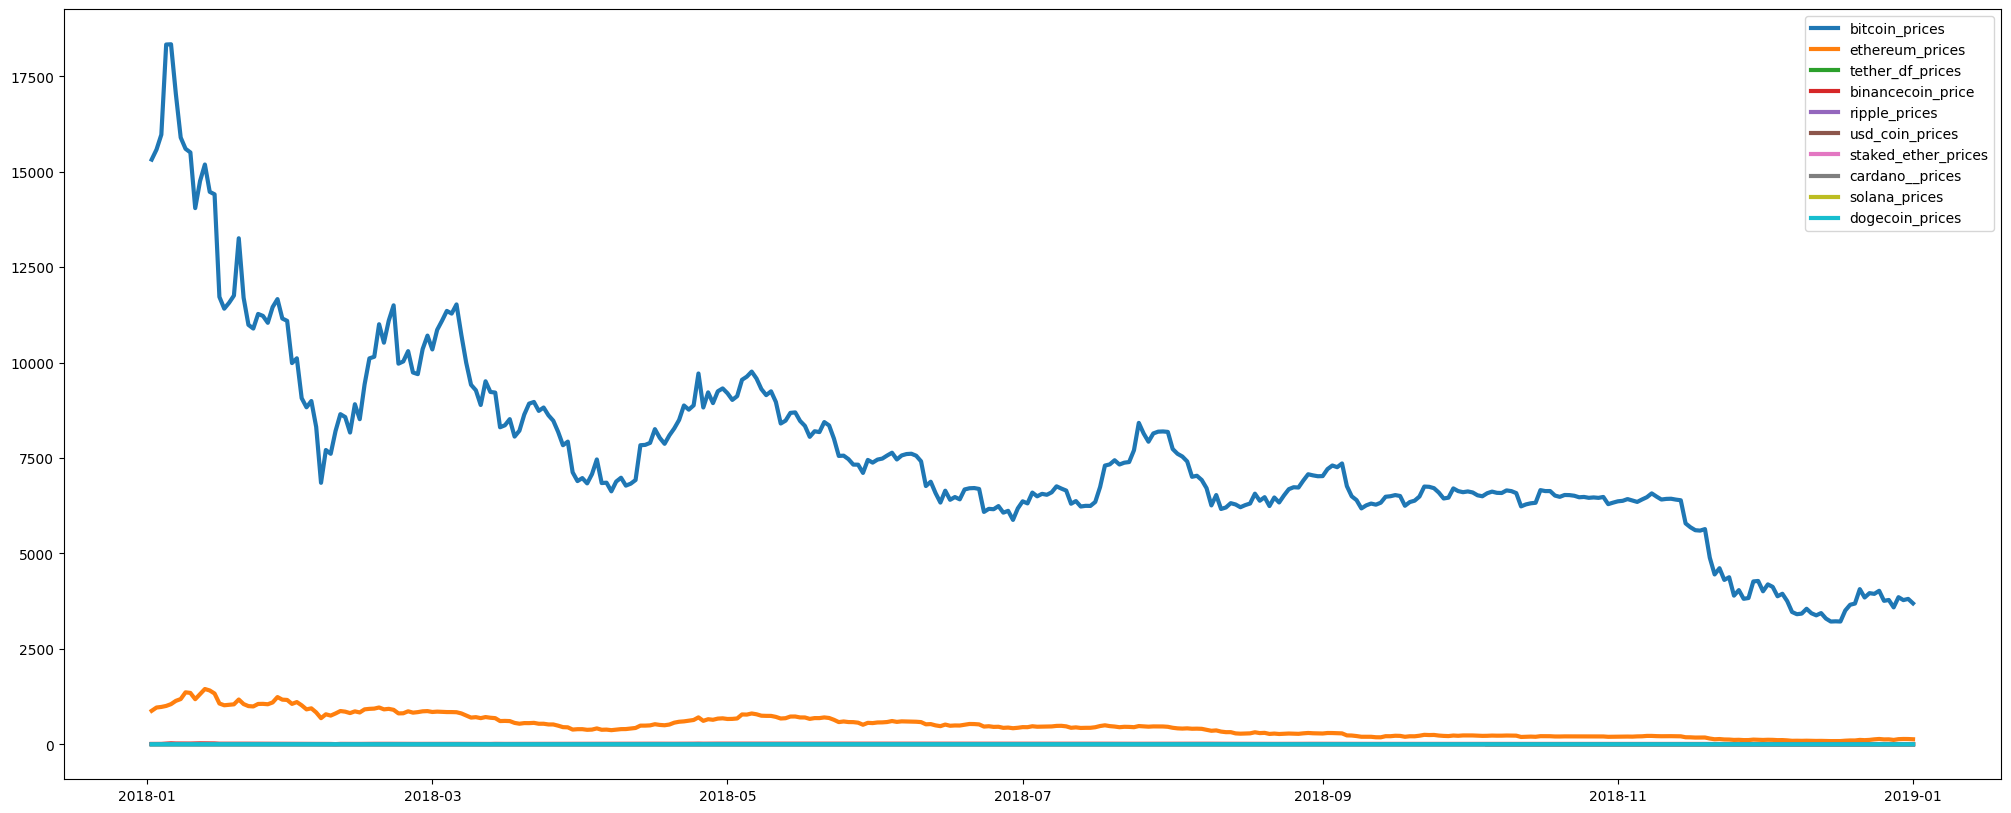

In [172]:
for year_number in range(2018, 2019):

    year_number = str(year_number)

    date_string = f'{year_number}-01-02'

    plot_range_dates(date_linspace, columns=['bitcoin_prices','ethereum_prices', 'tether_df_prices',
        'binancecoin_price', 'ripple_prices', 'usd_coin_prices',
        'staked_ether_prices', 'cardano__prices', 'solana_prices',
        'dogecoin_prices'], start_date=date_string, periods=365);

In [135]:
date_linspace_1 = linspace_for_dates("2018-01-01", 2055)

In [136]:
date_linspace_1

,dates
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
2050,2023-08-13
2051,2023-08-14
2052,2023-08-15
2053,2023-08-16


In [137]:
bitcoin_df.columns

Index(['prices', 'market_caps', 'total_volumes', 'dates'], dtype='object')

In [138]:
date_linspace_1 = date_linspace_1.merge(bitcoin_df[["dates", "market_caps", "total_volumes"]], on="dates", how="left").rename(columns={"market_caps": "bitcoin_market_cap", "total_volumes": "bitcoin_total_volumes"})
date_linspace_1 = date_linspace_1.merge(ethereum_df[["dates", "market_caps", "total_volumes"]], on="dates", how="left").rename(columns={"market_caps": "ethereum_market_cap", "total_volumes": "ethereum_total_volumes"})
date_linspace_1 = date_linspace_1.merge(tether_df[["dates", "market_caps", "total_volumes"]], on="dates", how="left").rename(columns={"market_caps": "tether_df_market_cap", "total_volumes": "tether_df_total_volumes"})
date_linspace_1 = date_linspace_1.merge(binancecoin_df[["dates", "market_caps", "total_volumes"]], on="dates", how="left").rename(columns={"market_caps": "binancecoinmarket_cap", "total_volumes": "binancecointotal_volumes"})
date_linspace_1 = date_linspace_1.merge(ripple_df[["dates", "market_caps", "total_volumes"]], on="dates", how="left").rename(columns={"market_caps": "ripple_market_cap", "total_volumes": "ripple_total_volumes"})
date_linspace_1 = date_linspace_1.merge(usd_coin_df[["dates", "market_caps", "total_volumes"]], on="dates", how="left").rename(columns={"market_caps": "usd_coin_market_cap", "total_volumes": "usd_coin_total_volumes"})
date_linspace_1 = date_linspace_1.merge(staked_ether_df[["dates", "market_caps", "total_volumes"]], on="dates", how="left").rename(columns={"market_caps": "staked_ether_market_cap", "total_volumes": "staked_ether_total_volumes"})
date_linspace_1 = date_linspace_1.merge(cardano_df[["dates", "market_caps", "total_volumes"]], on="dates", how="left").rename(columns={"market_caps": "cardano__market_cap", "total_volumes": "cardano__total_volumes"})
date_linspace_1 = date_linspace_1.merge(solana_df[["dates", "market_caps", "total_volumes"]], on="dates", how="left").rename(columns={"market_caps": "solana_market_cap", "total_volumes": "solana_total_volumes"})
date_linspace_1 = date_linspace_1.merge(dogecoin_df[["dates", "market_caps", "total_volumes"]], on="dates", how="left").rename(columns={"market_caps": "dogecoin_market_cap", "total_volumes": "dogecoin_total_volumes"})
market_cap_and_total_vol = date_linspace_1.copy()

In [139]:
market_cap_and_total_vol.columns

Index(['dates', 'bitcoin_market_cap', 'bitcoin_total_volumes',
       'ethereum_market_cap', 'ethereum_total_volumes', 'tether_df_market_cap',
       'tether_df_total_volumes', 'binancecoinmarket_cap',
       'binancecointotal_volumes', 'ripple_market_cap', 'ripple_total_volumes',
       'usd_coin_market_cap', 'usd_coin_total_volumes',
       'staked_ether_market_cap', 'staked_ether_total_volumes',
       'cardano__market_cap', 'cardano__total_volumes', 'solana_market_cap',
       'solana_total_volumes', 'dogecoin_market_cap',
       'dogecoin_total_volumes'],
      dtype='object')

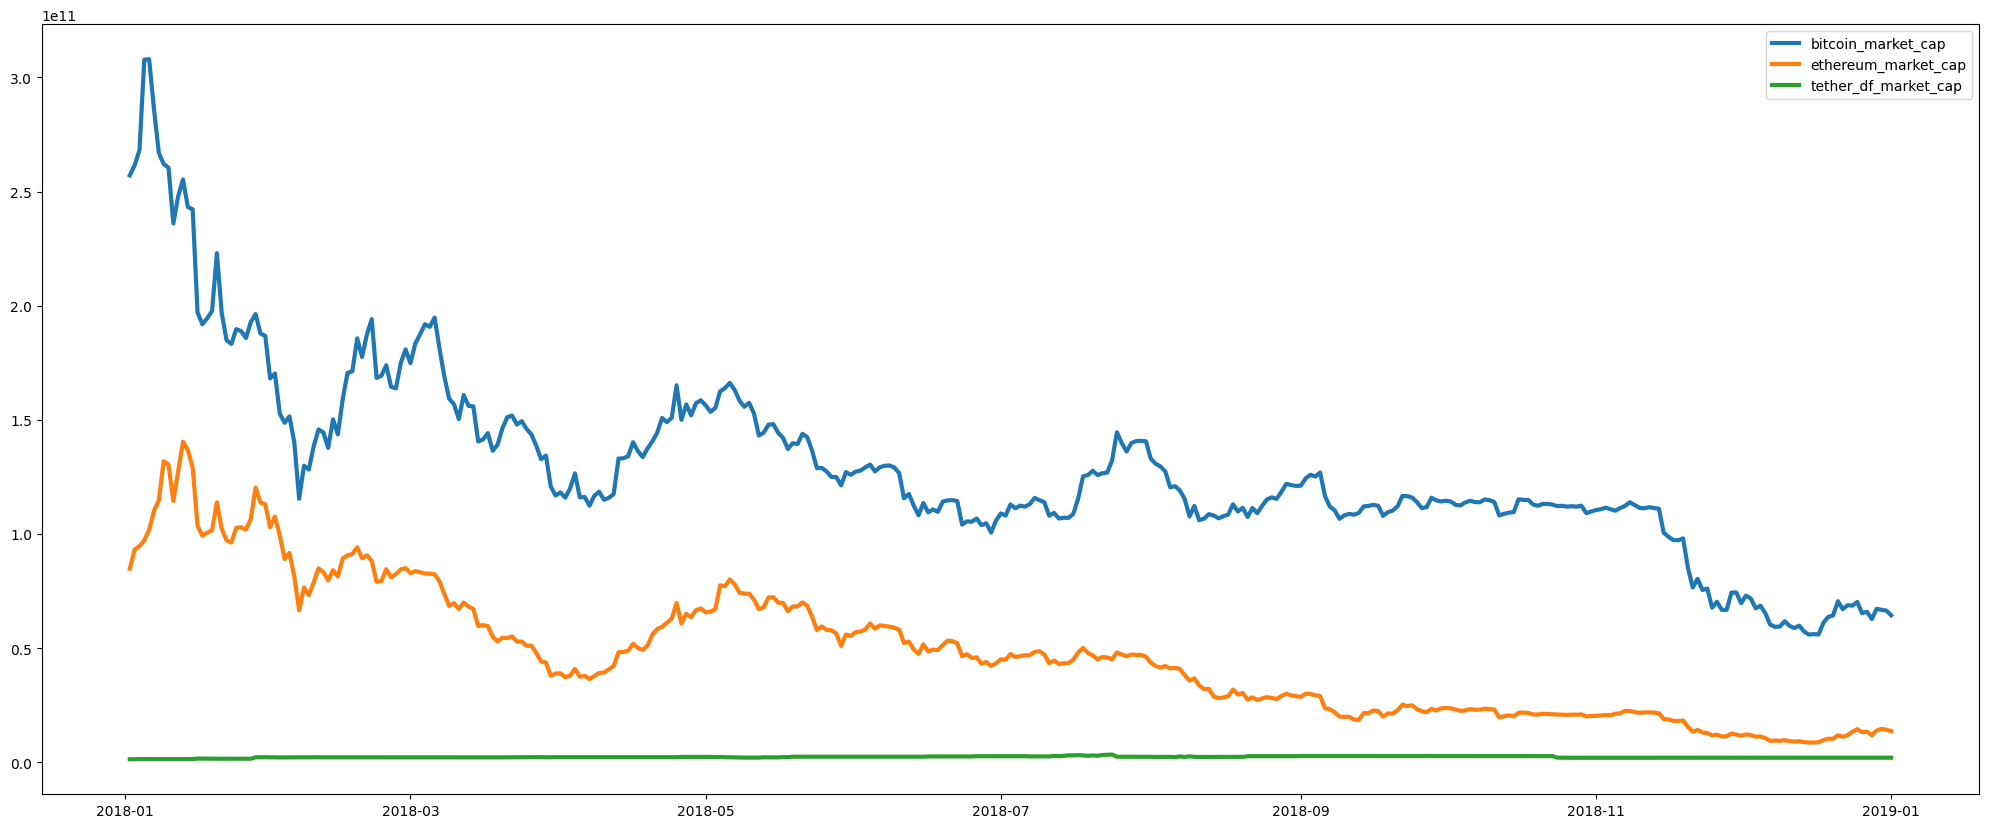

In [140]:
for year_number in range(2018, 2019):

    year_number = str(year_number)

    date_string = f'{year_number}-01-02'

    plot_range_price(date_linspace_1, columns=['bitcoin_market_cap', 'ethereum_market_cap', 'tether_df_market_cap'], start_date=date_string, periods=365);

In [81]:
date_linspace_1.columns

Index(['dates', 'bitcoin_market_cap', 'bitcoin_total_volumes',
       'ethereum_market_cap', 'ethereum_total_volumes', 'tether_df_market_cap',
       'tether_df_total_volumes', 'binancecoinmarket_cap',
       'binancecointotal_volumes', 'ripple_market_cap', 'ripple_total_volumes',
       'usd_coin_market_cap', 'usd_coin_total_volumes',
       'staked_ether_market_cap', 'staked_ether_total_volumes',
       'cardano__market_cap', 'cardano__total_volumes', 'solana_market_cap',
       'solana_total_volumes', 'dogecoin_market_cap',
       'dogecoin_total_volumes'],
      dtype='object')

In [82]:
def marketcap_vs_totalvolumes(dataframe:pd.DataFrame, columns:list):
    return dataframe[columns].sum().plot(kind="pie", subplots=True);

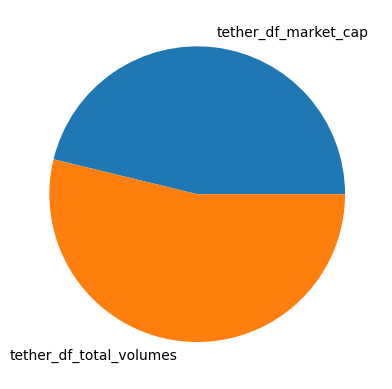

In [83]:
marketcap_vs_totalvolumes(dataframe=date_linspace_1, columns=[ 'tether_df_market_cap',
       'tether_df_total_volumes']);

In [146]:
np.log(coin_prices_df["bitcoin_prices"] / coin_prices_df["bitcoin_prices"].shift(1))

0            NaN
1            NaN
2       0.016952
3       0.024873
4       0.137806
          ...   
2049   -0.000917
2050    0.000520
2051   -0.004333
2052    0.003940
2053   -0.007857
Name: bitcoin_prices, Length: 2054, dtype: float64

In [147]:
coin_prices_df["bitcoin_prices"].rolling(window=30).std()

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2049    527.986129
2050    398.523347
2051    373.245578
2052    342.242198
2053    314.714232
Name: bitcoin_prices, Length: 2054, dtype: float64

In [180]:
bitcoin_prices =  bitcoin_df[["dates", "prices"]]



1. **Logarithmic Returns (`log_return`)**:
   
   The formula to calculate the logarithmic return is:
   
   $$
   Logarithmic Return = \ln \left( \frac{P_t}{P_{t-1}} \right)
   $$
   
   Where:
   
   - P_t is the current price.
   - P_{t-1} is the previous price.
   

2. **Rolling Standard Deviation (`rolling_std`)**:
   
   The formula to calculate the rolling standard deviation is:
   
   Rolling Std = Standard Deviation of Logarithmic Returns over a Window
   
   This involves calculating the standard deviation of a moving window of logarithmic returns.

3. **Annualized Volatility (`Volatility`)**:
   
   The formula to annualize volatility is:
   $$
   Annualized Volatility = Rolling Std  \times \sqrt{\text{Number of Trading Days in a Year}}
   $$
   Where:
   - Rolling Std is the rolling standard deviation calculated previously.
   $$
   - \sqrt{\text{Number of Trading Days in a Year}}  accounts for the scaling of volatility over a year's trading days.
   $$

\frac{P_t}{P_{t-1}}

In [182]:
# Calculate daily logaritmit returns
bitcoin_prices["log_return"] = np.log(bitcoin_prices["prices"] / bitcoin_prices["prices"].shift(1))

# Calculate rolling standard deviation
bitcoin_prices["rolling_std"] = bitcoin_prices["log_return"].rolling(window=30).std()

# Annualize volatility
bitcoin_prices["volatility"] = bitcoin_prices["rolling_std"] * (364 ** 0.5)

C:\Users\jdieg\AppData\Local\Temp\ipykernel_17104\2292808716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_prices["log_return"] = np.log(bitcoin_prices["prices"] / bitcoin_prices["prices"].shift(1))


In [190]:
class Calculations:

    def __init__(self, data_frame):
        self.data_frame = data_frame
        self.columns = data_frame.columns.tolist()

    def log_return(self, ):
        return np.log(self.data_frame[self.columns] / self.data_frame[self.columns].shift(1))

    # def rolling_stf(self):
    #     return data_frame["log_return"].rolling(window=30).std()

    # def volatility_calculations(self):
    #     return data_frame["rolling_std"] * (364 ** 0.5)

In [191]:
calculator = Calculations(coin_prices_df)

In [193]:
calculator.log_return()

['dates',
 'bitcoin_prices',
 'ethereum_prices',
 'tether_df_prices',
 'binancecoin_price',
 'ripple_prices',
 'usd_coin_prices',
 'staked_ether_prices',
 'cardano__prices',
 'solana_prices',
 'dogecoin_prices']

In [185]:
coin_prices_df

,dates,bitcoin_prices,ethereum_prices,tether_df_prices,binancecoin_price,ripple_prices,usd_coin_prices,staked_ether_prices,cardano__prices,solana_prices,dogecoin_prices
0,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,15321.932852,876.890259,1.003920,9.090393,2.455290,NaN,NaN,0.807430,NaN,0.009335
2,2018-01-03,15583.885538,963.055751,1.015780,9.886323,3.125710,NaN,NaN,1.075401,NaN,0.009592
3,2018-01-04,15976.365194,978.416104,1.002740,9.675758,3.220050,NaN,NaN,1.179347,NaN,0.010098
4,2018-01-05,18336.922980,1004.894972,0.999695,16.488523,2.931380,NaN,NaN,1.077821,NaN,0.013841
...,...,...,...,...,...,...,...,...,...,...,...
2049,2023-08-12,29396.847971,1847.541835,0.998938,239.595822,0.631618,1.000269,1846.298313,0.293325,24.579810,0.075714
2050,2023-08-13,29412.142275,1848.505239,0.999377,240.088445,0.627081,0.999880,1846.710998,0.291666,24.891819,0.076696
2051,2023-08-14,29284.969714,1839.512810,0.999384,240.030792,0.625689,0.999981,1837.912572,0.289372,24.223294,0.074778
2052,2023-08-15,29400.586804,1843.513391,0.998713,240.358056,0.634681,0.999688,1842.552503,0.290452,25.147725,0.074764


In [ ]:
volatility_calculations()

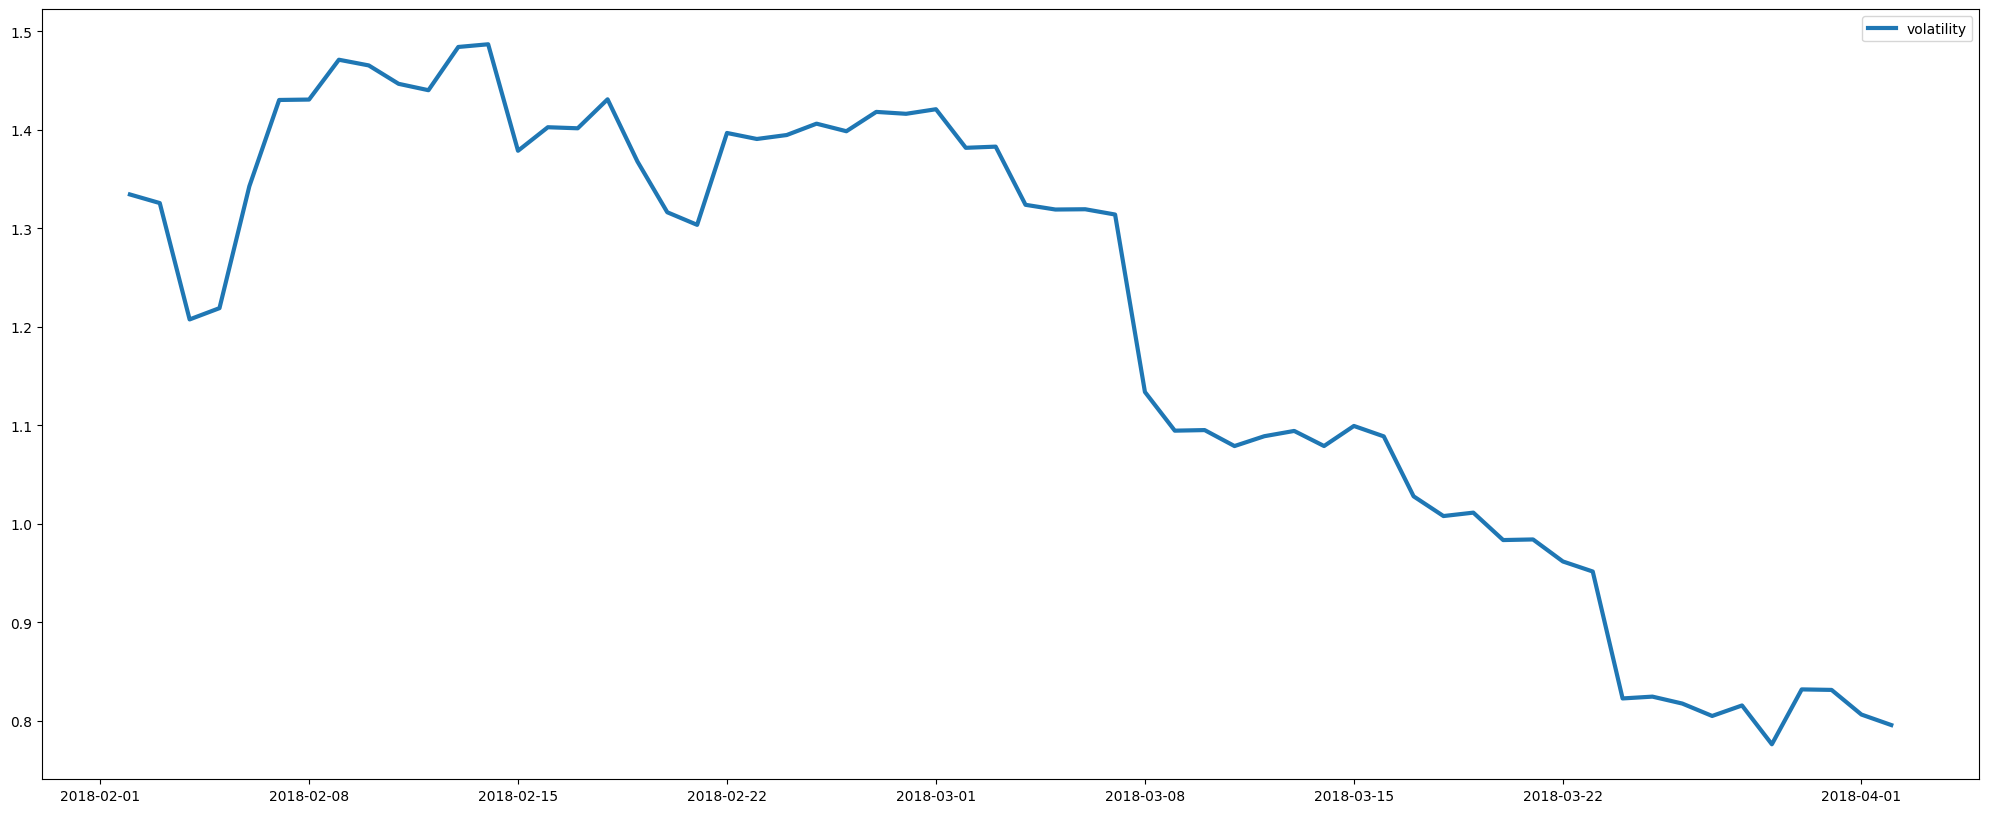

In [183]:
plot_range_dates(bitcoin_prices, ["volatility"], "2018-02-02", 60);